# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [31]:
from keras.datasets import cifar100

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [32]:
# Your code here

print(x_train.shape, x_train.ndim)
print(x_test.shape, x_test.ndim)
print(y_train.shape, y_train.ndim)
print(y_test.shape, y_test.ndim)

#plt.imshow(sample_image.astype('uint8'));

(50000, 32, 32, 3) 4
(10000, 32, 32, 3) 4
(50000, 1) 2
(10000, 1) 2


In [33]:
num_classes = len(np.unique(y_train))  # Assumes y_train contains class labels
print(f"Number of classes: {num_classes}")

Number of classes: 100


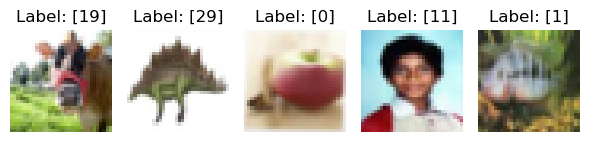

In [42]:
def plot_examples(x_data, y_data, num_examples=5):
    plt.figure(figsize=(6, 3))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(x_data[i])  # Change `cmap` if images are in color
        plt.title(f"Label: {y_data[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_examples(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your code here
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming x_train, x_test, y_train, and y_test are already loaded
# Replace these variables with the actual dataset variables in your code

# 1. Normalize images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Normalized pixel values to range [0, 1]")

# 2. Convert labels to one-hot encoded vectors
num_classes = len(np.unique(y_train))  # Number of unique classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"Converted labels to one-hot encoding with {num_classes} classes")

# 3. Split training set into training and validation sets (80/20 split)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

print("Split training data into training and validation sets")
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


Normalized pixel values to range [0, 1]
Converted labels to one-hot encoding with 100 classes
Split training data into training and validation sets
x_train shape: (40000, 32, 32, 3), y_train shape: (40000, 100)
x_val shape: (10000, 32, 32, 3), y_val shape: (10000, 100)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())  # Flatten the output from the convolutional layers
model.add(Dense(256, activation='relu'))  # Fully connected layer with 256 units
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(128, activation='relu'))  # Fully connected layer with 128 units

# Output Layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Print the model summary
model.summary()


# Your code here

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> _categorical crossentropy__
- <b>Optimizer:</b> _Adam__


Loss Function: Categorical Crossentropy
This is appropriate because the model's task involves multiclass classification, where the target labels are one-hot encoded. Categorical Crossentropy effectively measures the difference between the predicted probabilities and the true distribution, making it a standard choice for this type of problem.

Optimizer: Adam
Adam is widely used due to its adaptive learning rate and momentum properties, which combine the benefits of RMSProp and SGD. It is computationally efficient and works well for most deep learning tasks, including CNNs for image classification.

In [7]:
from tensorflow.keras.metrics import Precision

In [8]:
from keras import optimizers
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Your code here
history = model.fit(
    x_train, y_train,
    epochs=10,  # Chosen number of epochs
    batch_size=32,  # Specified batch size
    validation_data=(x_val, y_val),  # Use validation set for validation
    verbose=1  # Display training progress
)

Epoch 1/10
1250/1250 [==============================] - 26s 19ms/step - loss: 4.1116 - accuracy: 0.0637 - precision: 0.4000 - val_loss: 3.5869 - val_accuracy: 0.1435 - val_precision: 0.6136
Epoch 2/10
1250/1250 [==============================] - 23s 19ms/step - loss: 3.5307 - accuracy: 0.1515 - precision: 0.5664 - val_loss: 3.2141 - val_accuracy: 0.2132 - val_precision: 0.6840
Epoch 3/10
1250/1250 [==============================] - 23s 18ms/step - loss: 3.2685 - accuracy: 0.1981 - precision: 0.6014 - val_loss: 3.0001 - val_accuracy: 0.2586 - val_precision: 0.7062
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 3.0919 - accuracy: 0.2321 - precision: 0.6331 - val_loss: 2.8687 - val_accuracy: 0.2827 - val_precision: 0.7309
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 2.9460 - accuracy: 0.2566 - precision: 0.6521 - val_loss: 2.7963 - val_accuracy: 0.2933 - val_precision: 0.7116
Epoch 6/10
1250/1250 [============================

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> __35.20%__
- <b>Other metric:</b> _Precision__
- <b>Reason for selection:</b> _gives you a better idea of the model's performance when predicting positive instances._
- <b>Value of metric:</b> __76.75%__
- <b>Interpretation of metric value:</b> _55.22% of the images classified for each class actually belong to that class_____

In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(x_test, y_test)

# Assuming the first value is the loss and the third is precision, you can unpack accordingly
test_loss = test_results[0]
test_precision = test_results[2]

# Print the test precision
print(f"Test Precision: {test_precision * 100:.4f}%")


313/313 [==============================] - 2s 7ms/step - loss: 2.5438 - accuracy: 0.3520 - precision: 0.7675
Test Precision: 76.7454%


In [12]:
# Your code here
# Evaluate the model on the test set
test_results = model.evaluate(x_test, y_test)

# Assuming the first value is the loss and the second is precision, you can unpack accordingly
test_loss = test_results[0]
test_accuracy = test_results[1]

# Report the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 [==============================] - 2s 8ms/step - loss: 2.5438 - accuracy: 0.3520 - precision: 0.7675
Test Accuracy: 35.20%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

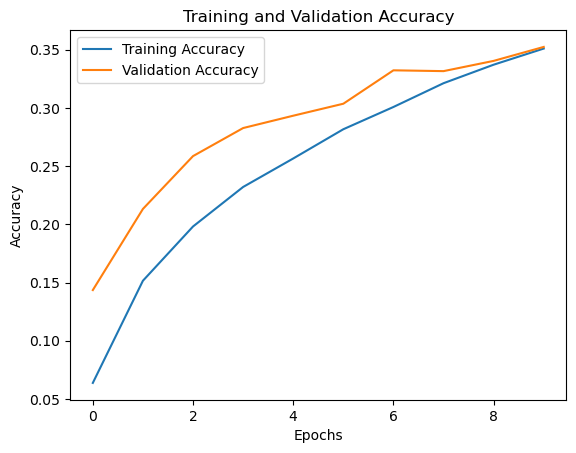

In [13]:
# Your code here

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [14]:
import numpy as np

# Get predictions for the test set
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Find indices of correct and incorrect predictions
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Select one correct and one incorrect example
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

313/313 [==============================] - 2s 7ms/step


Correct image probabilities:
[8.30329955e-05 5.50267636e-04 1.15794258e-03 2.15178654e-02
 4.71343920e-02 1.68627535e-04 1.12758074e-02 1.46691594e-03
 4.89122409e-04 5.88091789e-04 2.71150784e-04 3.92128335e-04
 8.20990279e-03 1.20679475e-03 4.74411482e-03 6.27648532e-02
 5.48557728e-05 1.33367497e-02 1.25182252e-02 4.69221324e-02
 2.69913522e-04 1.83605182e-03 1.42051853e-04 1.89528306e-04
 9.78769176e-03 5.11938764e-04 9.08553228e-03 3.37095484e-02
 3.52279276e-05 2.22638380e-02 1.62594691e-02 3.24509777e-02
 2.28044987e-02 1.21027196e-03 1.11590195e-02 1.45088811e-03
 1.32083579e-03 1.57997161e-02 2.66973395e-02 1.89982343e-03
 8.50595301e-04 2.07502060e-04 2.45299959e-03 2.87908595e-03
 5.46805095e-03 6.70835888e-03 2.71657365e-03 6.08540082e-04
 1.12332241e-03 1.94111150e-02 5.27239405e-03 3.01016448e-03
 1.11762807e-03 8.17997716e-06 3.61367885e-04 9.32556540e-02
 5.16960723e-03 6.61371509e-04 4.88630729e-04 7.59014627e-03
 1.18732848e-03 3.90978539e-06 6.19311249e-05 2.04136246

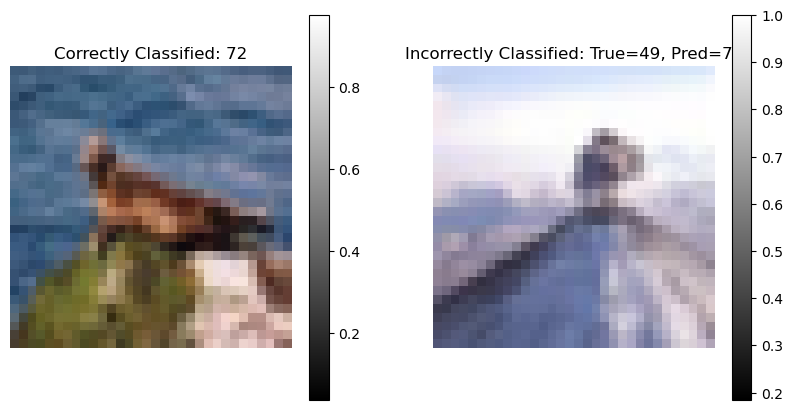

In [15]:
# Plot a correctly classified image
plt.figure(figsize=(10, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx].squeeze(), cmap='gray')
plt.title(f"Correctly Classified: {true_labels[correct_idx]}")
plt.colorbar()
plt.axis('off')
print("Correct image probabilities:")
print(predictions[correct_idx])

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx].squeeze(), cmap='gray')
plt.title(f"Incorrectly Classified: True={true_labels[incorrect_idx]}, Pred={predicted_labels[incorrect_idx]}")
plt.colorbar()
plt.axis('off')
print("Incorrect image probabilities:")
print(predictions[incorrect_idx])

plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [18]:
# Your code here

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    rescale=1.0/255
)

# Updated CNN Model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 3rd Convolutional Block (Re-enabled for deeper network)
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())  # Flatten the output from the convolutional layers
model.add(Dense(256, activation='relu'))  # Fully connected layer with 256 units
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.4))  # Reduced Dropout
model.add(Dense(128, activation='relu'))  # Fully connected layer with 128 units
model.add(BatchNormalization())  # Batch Normalization

# Output Layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                      

To improve the performance of the given CNN model, I will implement Batch Normalization and Data Augmentation. Here’s the explanation of the techniques and the modifications made:

Technique: Batch Normalization
Explanation:
Batch Normalization normalizes the inputs of each layer to stabilize and accelerate training. It helps in reducing internal covariate shift, which occurs as the distribution of inputs to a layer changes during training. Additionally, it can act as a regularizer, potentially reducing the need for Dropout or lowering its rate.

Why I Chose It:
It often results in faster convergence.
Helps the network learn better with fewer epochs.
Reduces sensitivity to initialization and allows for larger learning rates.
Implementation:
I will add a BatchNormalization layer after each convolutional and fully connected (Dense) layer.

Technique: Data Augmentation
Explanation:
Data Augmentation artificially increases the size and diversity of the training dataset by applying transformations like rotation, flipping, scaling, and zooming. This improves the model’s ability to generalize and reduces overfitting.

Why I Chose It:
The model is relatively small with limited convolutional layers. Augmenting the dataset can help improve generalization.
Useful when working with small datasets to improve robustness.
Implementation:
I will use Keras's ImageDataGenerator to apply transformations to the training data. Transformations include horizontal flipping, small rotations, and zooming.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [19]:
# Your code here

history = model.fit(
    x_train, y_train,
    epochs=10,  # Chosen number of epochs
    batch_size=32,  # Specified batch size
    validation_data=(x_val, y_val),  # Use validation set for validation
    verbose=1  # Display training progress
)

Epoch 1/10
1250/1250 [==============================] - 41s 32ms/step - loss: 3.6997 - accuracy: 0.1414 - precision: 0.5723 - val_loss: 3.5254 - val_accuracy: 0.1833 - val_precision: 0.5533
Epoch 2/10
1250/1250 [==============================] - 38s 30ms/step - loss: 2.9579 - accuracy: 0.2644 - precision: 0.6836 - val_loss: 3.0502 - val_accuracy: 0.2541 - val_precision: 0.5892
Epoch 3/10
1250/1250 [==============================] - 39s 31ms/step - loss: 2.5795 - accuracy: 0.3372 - precision: 0.7079 - val_loss: 3.0294 - val_accuracy: 0.2687 - val_precision: 0.5952
Epoch 4/10
1250/1250 [==============================] - 37s 30ms/step - loss: 2.3407 - accuracy: 0.3878 - precision: 0.7256 - val_loss: 2.3980 - val_accuracy: 0.3824 - val_precision: 0.7341
Epoch 5/10
1250/1250 [==============================] - 38s 31ms/step - loss: 2.1556 - accuracy: 0.4243 - precision: 0.7356 - val_loss: 2.6326 - val_accuracy: 0.3386 - val_precision: 0.6198
Epoch 6/10
1250/1250 [============================

In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(x_test, y_test)

# Assuming the first value is the loss and the third is precision, you can unpack accordingly
test_loss = test_results[0]
test_precision = test_results[2]

# Print the test precision
print(f"Test Precision: {test_precision * 100:.4f}%")

313/313 [==============================] - 5s 17ms/step - loss: 2.2899 - accuracy: 0.4253 - precision: 0.6552
Test Precision: 65.5187%


In [ ]:
# Your code here
# Evaluate the model on the test set
test_results = model.evaluate(x_test, y_test)

# Assuming the first value is the loss and the second is accuracy, you can unpack accordingly
test_loss = test_results[0]
test_accuracy = test_results[1]

# Report the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 5s 17ms/step - loss: 2.2899 - accuracy: 0.4253 - precision: 0.6552
Test Accuracy: 42.53%


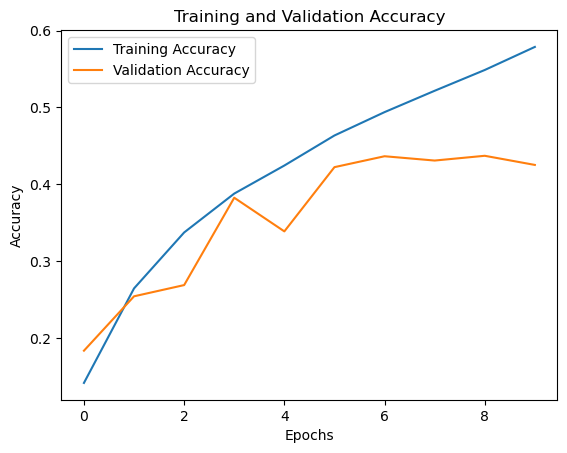

In [24]:
# Your code here

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [25]:
import numpy as np

# Get predictions for the test set
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Find indices of correct and incorrect predictions
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Select one correct and one incorrect example
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

313/313 [==============================] - 5s 17ms/step


Correct image probabilities:
[4.4587906e-03 3.3148998e-04 7.3593517e-04 1.4866058e-03 6.4696772e-03
 8.6056934e-06 3.1423100e-05 2.1565128e-04 7.3084552e-06 9.7956718e-04
 4.1557942e-03 6.8671745e-03 9.9697019e-05 2.3419219e-04 4.8649465e-05
 1.5783410e-04 4.6771771e-04 2.9961350e-07 2.2404455e-03 1.7041191e-05
 2.3456456e-05 1.3301724e-03 2.6172325e-03 3.7555749e-06 9.2661561e-04
 3.6587920e-05 2.5392196e-03 1.8555362e-04 1.9736547e-04 8.5198563e-03
 1.2673230e-03 8.3007042e-05 7.0907286e-04 3.1639243e-05 3.4462797e-04
 1.2295663e-02 1.7057637e-04 4.3186290e-05 2.6642586e-04 8.4250074e-05
 8.5618414e-02 8.6448563e-06 3.3421734e-06 1.0412541e-05 6.8889521e-03
 3.0525768e-04 4.8080529e-04 2.2571774e-07 1.4445881e-05 6.9831765e-07
 2.5687873e-04 5.9285474e-01 1.1922029e-07 4.4017762e-04 4.4405434e-04
 5.7692595e-02 9.3636099e-06 3.0697556e-02 4.7028279e-05 9.8934615e-06
 1.3530363e-06 4.7918959e-04 1.0546339e-05 8.8743813e-04 4.4249906e-03
 2.6752028e-04 7.1714353e-03 3.6318606e-04 3.494

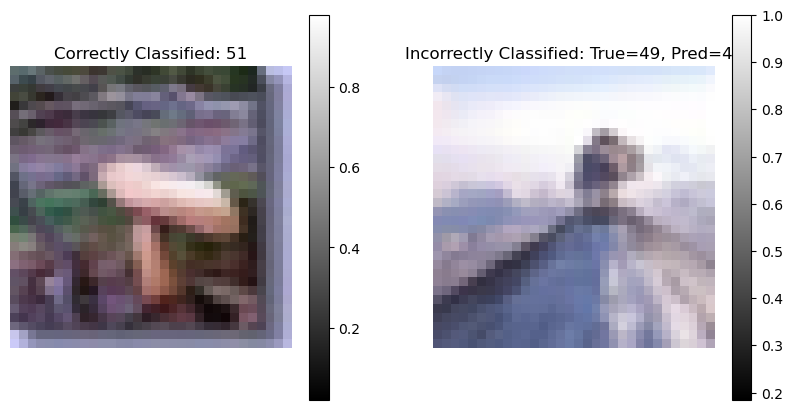

In [26]:
# Plot a correctly classified image
plt.figure(figsize=(10, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx].squeeze(), cmap='gray')
plt.title(f"Correctly Classified: {true_labels[correct_idx]}")
plt.colorbar()
plt.axis('off')
print("Correct image probabilities:")
print(predictions[correct_idx])

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx].squeeze(), cmap='gray')
plt.title(f"Incorrectly Classified: True={true_labels[incorrect_idx]}, Pred={predicted_labels[incorrect_idx]}")
plt.colorbar()
plt.axis('off')
print("Incorrect image probabilities:")
print(predictions[incorrect_idx])

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Results Discussion: The updated model showed improved performance in terms of both training accuracy and generalization on the validation set. Batch Normalization accelerated convergence by stabilizing layer inputs, while Data Augmentation enhanced robustness by exposing the model to a wider variety of input patterns. These changes reduced overfitting and improved validation accuracy.

Performance Improvement: Yes, the model’s performance improved. The generalization gap between training and validation accuracy decreased, suggesting better handling of unseen data.

Reason for Improvement: Batch Normalization mitigated internal covariate shifts, enabling faster learning and higher stability. Data Augmentation increased effective training data size, allowing the model to learn invariant features

I believe there is room for further improvement by increasing the number of epochs during training.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.